# LinkedIn Job Posting 2023 Data Analysis

## Project Dataset Content: (3 parts)
#### 1- job_postings.csv (Main Dataset)

#### 2- (job_details) Folder
##### benefits.csv, job_industries.csv, job_skills.csv

#### 3- (company_details) Folder
##### companies.csv, company_industries.csv, company_specialities.csv, employee_counts.csv



## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns
%matplotlib inline

## Loading dataframs and merge it to be one dataframe

#### 1- job_postings.csv (Main Dataset)

In [2]:
# Read Main Dataframe
job_postings_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/job_postings.csv')
job_postings_data


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


##### Checking the duplication and null data in (job_id), as (job_id) is the primary-key column that will use for merge

In [3]:
job_postings_data['job_id'].duplicated().sum()

0

In [4]:
job_postings_data['job_id'].isnull().sum()

0

In [5]:
job_postings_data['job_id'].isna().sum()
# Comment: No duplication and null values found in (job_postings_data)

0

### 2- (job_details) Folder
##### benefits.csv, job_industries.csv, job_skills.csv

##### Loading (benefits.csv) Dataset

In [6]:
job_benefits_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/job_details/benefits.csv')
job_benefits_data

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance
...,...,...,...
13756,3701373527,0,Medical insurance
13757,3701373527,0,Vision insurance
13758,3701373527,0,Dental insurance
13759,3701373527,0,401(k)


##### Comment: in benefits dataset, there is a duplications in (job_id) and column (inferred) is unrelated,
#### so we need to remove duplication in (job_id) and remove (inferred) column

In [7]:
## Remove (inferred) column
job_benefits_data.drop('inferred', axis= 1, inplace= True)

In [8]:
## Remove duplicated rows in (job_id)
job_id_dup = job_benefits_data[job_benefits_data['job_id'].duplicated()]
job_id_dup

,job_id,type
1,3690843087,Dental insurance
2,3690843087,401(k)
3,3690843087,Paid maternity leave
4,3690843087,Disability insurance
5,3690843087,Vision insurance
...,...,...
13755,3701373493,Paid paternity leave
13757,3701373527,Vision insurance
13758,3701373527,Dental insurance
13759,3701373527,401(k)


In [9]:
## We found that we couldn't remove the duplicated (job_id) cause the (type) column related is not duplicated, which means one job_id have
## more than one benefit, accordignly we will aggregate (job_id) with (type)
job_benefits_data = job_benefits_data.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job benefits

In [10]:
## Now every job_id have multiple job benefits
job_benefits_data

,job_id,type
0,85008768,"Medical insurance, Vision insurance, Dental in..."
1,133114754,"Medical insurance, 401(k), Vision insurance"
2,529257371,"Medical insurance, Vision insurance, Dental in..."
3,967848246,401(k)
4,1483357774,"Medical insurance, Vision insurance, Dental in..."
...,...,...
5491,3701373382,401(k)
5492,3701373383,"401(k), Tuition assistance"
5493,3701373432,"Medical insurance, Vision insurance, Dental in..."
5494,3701373493,"401(k), Paid paternity leave"


In [11]:
job_benefits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   job_id  5496 non-null   int64 
 1   type    5496 non-null   object
dtypes: int64(1), object(1)
memory usage: 86.0+ KB


#### Merge the main dataset (job_postings_data) with (job_benefits_data)

In [12]:
job_postings_data = job_postings_data.merge(job_benefits_data, on= 'job_id', how= 'left')
job_postings_data.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in..."
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in..."


#### Load and merge (job_skills_data) with (job_postings_data) the main dataset

In [13]:
## Load job_skills dataset
job_skills_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/job_details/job_skills.csv')
job_skills_data.head()

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT


In [14]:
job_skills_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27899 entries, 0 to 27898
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_id     27899 non-null  int64 
 1   skill_abr  27899 non-null  object
dtypes: int64(1), object(1)
memory usage: 436.0+ KB


In [15]:
## Aggregate same job skills
job_skills_data = job_skills_data.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index()
job_skills_data.head()

,job_id,skill_abr
0,85008768,"SALE, BD"
1,133114754,"SALE, BD"
2,133196985,"ACCT, FIN"
3,529257371,"DSGN, ART, IT"
4,903408693,ADM


In [16]:
job_skills_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15637 entries, 0 to 15636
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_id     15637 non-null  int64 
 1   skill_abr  15637 non-null  object
dtypes: int64(1), object(1)
memory usage: 244.5+ KB


In [17]:
## Merge (job_skills_data) with main dataset (job_postings_data)
job_postings_data = job_postings_data.merge(job_skills_data, on= 'job_id', how= 'left')
job_postings_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type,skill_abr
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD"
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance","SALE, BD"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,NaN,"ACCT, FIN"
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in...","DSGN, ART, IT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN,"ENG, IT"
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN,ADM
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN,HCPR
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN,OTHR


### 3- (company_details) Folder
##### companies.csv, company_industries.csv, company_specialities.csv, employee_counts.csv

#### Loading companies data 

In [18]:
## Read companies dataset
company_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/company_details/companies.csv')
company_data.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


#### Loading company industries data

In [19]:
## Read industries data
company_industries_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/company_details/company_industries.csv')
company_industries_data.head()

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising


In [20]:
## Check if there are a duplications in (company_id)
company_industries_data.duplicated().sum()

9877

In [21]:
## Check (company_industries_data) info to know number of columns and rows
company_industries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  15880 non-null  int64 
 1   industry    15880 non-null  object
dtypes: int64(1), object(1)
memory usage: 248.2+ KB


In [22]:
## Aggregate same company industries
company_industries_data = company_industries_data.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index()
company_industries_data.head()

,company_id,industry
0,1009,"Information Technology & Services, Information..."
1,1016,"Hospital & Health Care, Hospital & Health Care..."
2,1021,Renewables & Environment
3,1025,Information Technology & Services
4,1028,"Information Technology & Services, Information..."


In [23]:
company_industries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  6003 non-null   int64 
 1   industry    6003 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


#### Loading company specialities

In [24]:
## Read company_specialities dataset
company_specialities_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/company_details/company_specialities.csv')
company_specialities_data.head()

,company_id,speciality
0,81149246,Childrens Music Education
1,81149246,Foundational Music Theory
2,81149246,Child Music Lessons
3,81149246,social emotional learning
4,81149246,social emotional development


In [25]:
company_specialities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  128355 non-null  int64 
 1   speciality  128355 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [26]:
## Aggregate same company specialities
company_specialities_data = company_specialities_data.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index()
company_specialities_data.head()

,company_id,speciality
0,1009,"Cloud, Mobile, Cognitive, Security, Research, ..."
1,1016,"Healthcare, Biotechnology, Healthcare, Biotech..."
2,1021,"Distributed Power, Gasification, Generators, H..."
3,1028,"enterprise, software, applications, database, ..."
4,1038,"Audit, Consulting, Financial Advisory, Risk Ma..."


In [27]:
company_specialities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  4487 non-null   int64 
 1   speciality  4487 non-null   object
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


#### Load employee count dataset

In [28]:
## Read employee_counts dataset
employee_counts_data = pd.read_csv('/Users/sayed.ahmed/Library/CloudStorage/GoogleDrive-sayed.ahmed.sayed@gmail.com/My Drive/DataScience/DS_Projects/Epsilon_mid-project/LinkedIn Job Postings 2023/Dataset/company_details/employee_counts.csv')
employee_counts_data.head()

,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,1.692645e+09
1,10033339,3,187,1.692645e+09
2,6049228,20,82,1.692645e+09
3,2641066,45,2336,1.692645e+09
4,96649998,0,2,1.692645e+09


In [29]:
employee_counts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      15907 non-null  int64  
 1   employee_count  15907 non-null  int64  
 2   follower_count  15907 non-null  int64  
 3   time_recorded   15907 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 497.2 KB


In [30]:
## Get newset data based on "time_recorded" column
employee_counts_data = employee_counts_data.groupby('company_id')['time_recorded'].max().reset_index()
employee_counts_data.head()

,company_id,time_recorded
0,1009,1.692851e+09
1,1016,1.692861e+09
2,1021,1.692866e+09
3,1025,1.692840e+09
4,1028,1.692867e+09


In [31]:
employee_counts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_id     6030 non-null   int64  
 1   time_recorded  6030 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 94.3 KB


#### Merge companies datasets with main company dataset

In [32]:
company_data = company_data.merge(company_industries_data, on= 'company_id', how= 'left')
company_data = company_data.merge(company_specialities_data, on= 'company_id', how= 'left')
company_data = company_data.merge(employee_counts_data, on= 'company_id', how= 'left')
company_data.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,"Information Technology & Services, Information...","Cloud, Mobile, Cognitive, Security, Research, ...",1.692851e+09
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,Renewables & Environment,"Distributed Power, Gasification, Generators, H...",1.692866e+09
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,Information Technology & Services,NaN,1.692840e+09
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,"Information Technology & Services, Information...","enterprise, software, applications, database, ...",1.692867e+09


In [33]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_id     6063 non-null   int64  
 1   name           6063 non-null   object 
 2   description    5999 non-null   object 
 3   company_size   5474 non-null   float64
 4   state          6060 non-null   object 
 5   country        6063 non-null   object 
 6   city           6063 non-null   object 
 7   zip_code       6055 non-null   object 
 8   address        6058 non-null   object 
 9   url            6063 non-null   object 
 10  industry       5953 non-null   object 
 11  speciality     4452 non-null   object 
 12  time_recorded  5980 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 615.9+ KB


#### Merging job_posting dataset with company dataset

In [34]:
jobs = job_postings_data.merge(company_data, on= 'company_id', how= 'left')
jobs.head()

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,https://www.linkedin.com/company/employvision,Staffing & Recruiting,NaN,1.692772e+09
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,2.0,Texas,US,Forney,75126,1003 College St,https://www.linkedin.com/company/fbc-forney,Religious Institutions,NaN,1.692832e+09
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.0,California,US,San Francisco,94103,310 Seventh Street,https://www.linkedin.com/company/ken-fulk-inc.,Design,NaN,1.692868e+09


#### This is the Merged Dataset final Dataframe

In [35]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   description_x               15885 non-null  object 
 4   max_salary                  5521 non-null   float64
 5   med_salary                  981 non-null    float64
 6   min_salary                  5521 non-null   float64
 7   pay_period                  6502 non-null   object 
 8   formatted_work_type         15886 non-null  object 
 9   location                    15886 non-null  object 
 10  applies                     8700 non-null   float64
 11  original_listed_time        15886 non-null  float64
 12  remote_allowed              2340 non-null   float64
 13  views                       131

#### Explore the data for cleaning processing 

In [36]:
# Check if there is a missing value
jobs.isnull().sum()

job_id                            0
company_id                      366
title                             0
description_x                     1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
type                        

In [37]:
# Command for explore the full data columns name
pd.set_option('display.max_columns', None)
jobs.head(1)

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type,skill_abr,name,description_y,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.690000e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create a new dataframe by eliminates certain columns to be use for analysis, and rename columns for better understanding

In [38]:
## Build new dataframe
new_columns1 = ['title', 'max_salary', 'med_salary', 'min_salary', 'pay_period','formatted_work_type', 'location','applies', 
'remote_allowed', 'views', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'sponsored', 'work_type', 'compensation_type',
 'type', 'skill_abr', 'name', 'company_size', 'state', 'country', 'city', 'industry', 'speciality', 'time_recorded' ]


In [39]:
jobs = jobs[new_columns1]
jobs.head()

,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,formatted_experience_level,sponsored,work_type,compensation_type,type,skill_abr,name,company_size,state,country,city,industry,speciality,time_recorded
0,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,5.0,ComplexOnsiteApply,1.710000e+12,NaN,NaN,1,FULL_TIME,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,NaN,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,0,FULL_TIME,NaN,"Medical insurance, 401(k), Vision insurance","SALE, BD",CargoLogin.,1.0,California,US,Santa Clarita,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
2,Model Risk Auditor,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,NaN,17.0,ComplexOnsiteApply,1.700000e+12,NaN,NaN,0,CONTRACT,NaN,NaN,"ACCT, FIN",Employvision Inc.,1.0,New Jersey,US,Somerset,Staffing & Recruiting,NaN,1.692772e+09
3,Business Manager,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",NaN,NaN,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,0,FULL_TIME,NaN,NaN,NaN,First Baptist Church Forney,2.0,Texas,US,Forney,Religious Institutions,NaN,1.692832e+09
4,NY Studio Assistant,NaN,NaN,NaN,NaN,Full-time,"New York, NY",NaN,NaN,2.0,ComplexOnsiteApply,1.710000e+12,NaN,NaN,1,FULL_TIME,NaN,"Medical insurance, Vision insurance, Dental in...","DSGN, ART, IT",Ken Fulk Inc,1.0,California,US,San Francisco,Design,NaN,1.692868e+09


In [40]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       15886 non-null  object 
 1   max_salary                  5521 non-null   float64
 2   med_salary                  981 non-null    float64
 3   min_salary                  5521 non-null   float64
 4   pay_period                  6502 non-null   object 
 5   formatted_work_type         15886 non-null  object 
 6   location                    15886 non-null  object 
 7   applies                     8700 non-null   float64
 8   remote_allowed              2340 non-null   float64
 9   views                       13123 non-null  float64
 10  application_type            15886 non-null  object 
 11  expiry                      15886 non-null  float64
 12  closed_time                 928 non-null    float64
 13  formatted_experience_level  109

In [41]:
jobs.isna().sum()

title                             0
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
remote_allowed                13546
views                          2763
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
sponsored                         0
work_type                         0
compensation_type              9384
type                          10390
skill_abr                       637
name                            416
company_size                   1111
state                           419
country                         416
city                            416
industry                        443
speciality                     3499
time_recorded                   416
dtype: int64

In [42]:
## Renaming columns name for better understanding
update_column_name = {'title': 'job_title', 'name':'company_name', 'formatted_work_type':'work_type',
 'formatted_experience_level': 'experience_level', 'type': 'benefits_type' }
jobs = jobs.rename(columns= update_column_name)
jobs

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,work_type,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded
0,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,5.0,ComplexOnsiteApply,1.710000e+12,NaN,NaN,1,FULL_TIME,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,NaN,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,0,FULL_TIME,NaN,"Medical insurance, 401(k), Vision insurance","SALE, BD",CargoLogin.,1.0,California,US,Santa Clarita,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
2,Model Risk Auditor,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,NaN,17.0,ComplexOnsiteApply,1.700000e+12,NaN,NaN,0,CONTRACT,NaN,NaN,"ACCT, FIN",Employvision Inc.,1.0,New Jersey,US,Somerset,Staffing & Recruiting,NaN,1.692772e+09
3,Business Manager,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",NaN,NaN,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,0,FULL_TIME,NaN,NaN,NaN,First Baptist Church Forney,2.0,Texas,US,Forney,Religious Institutions,NaN,1.692832e+09
4,NY Studio Assistant,NaN,NaN,NaN,NaN,Full-time,"New York, NY",NaN,NaN,2.0,ComplexOnsiteApply,1.710000e+12,NaN,NaN,1,FULL_TIME,NaN,"Medical insurance, Vision insurance, Dental in...","DSGN, ART, IT",Ken Fulk Inc,1.0,California,US,San Francisco,Design,NaN,1.692868e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",NaN,NaN,1.0,OffsiteApply,1.700000e+12,NaN,Entry level,0,PART_TIME,NaN,NaN,"ENG, IT",Aspire Bakeries,5.0,California,US,Los Angeles,"Food Production, Food Production, Food Product...",NaN,1.692869e+09
15882,Unit Secretary,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",2.0,NaN,7.0,OffsiteApply,1.700000e+12,NaN,Entry level,0,FULL_TIME,NaN,NaN,ADM,Holy Name Medical Center,5.0,New Jersey,US,Teaneck,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15883,"Radiology Aide, Perdiem",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",NaN,NaN,3.0,OffsiteApply,1.700000e+12,NaN,Entry level,0,PART_TIME,NaN,NaN,HCPR,Holy Name Medical Center,5.0,New Jersey,US,Teaneck,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15884,MRI Manager,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",NaN,NaN,10.0,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,0,FULL_TIME,BASE_SALARY,NaN,OTHR,Columbia University Irving Medical Center,7.0,New York,US,New York,Hospital & Health Care,"Medicine, Education, Healthcare, Science, Biom...",1.692869e+09


In [43]:
jobs.describe()

,max_salary,med_salary,min_salary,applies,remote_allowed,views,expiry,closed_time,sponsored,company_size,time_recorded
count,5.521000e+03,981.000000,5521.000000,8700.000000,2340.0,13123.000000,1.588600e+04,9.280000e+02,15886.000000,14775.000000,1.547000e+04
mean,8.833622e+04,41167.664404,62352.218073,22.833103,1.0,76.776575,1.700765e+12,1.690000e+12,0.289248,4.849069,1.692850e+09
std,9.068282e+04,93682.094905,59487.692283,54.892826,0.0,167.459105,2.709377e+09,0.000000e+00,0.453428,2.059515,2.402825e+04
min,1.000000e+01,10.000000,10.000000,1.000000,1.0,1.000000,1.690000e+12,1.690000e+12,0.000000,1.000000,1.692645e+09
25%,4.800000e+01,18.000000,38.000000,2.000000,1.0,6.000000,1.700000e+12,1.690000e+12,0.000000,3.000000,1.692842e+09
50%,8.200000e+04,26.000000,60000.000000,6.000000,1.0,25.000000,1.700000e+12,1.690000e+12,0.000000,5.000000,1.692858e+09
75%,1.400000e+05,52000.000000,99000.000000,21.000000,1.0,78.000000,1.700000e+12,1.690000e+12,1.000000,7.000000,1.692863e+09
max,1.300000e+06,998426.000000,800000.000000,1615.000000,1.0,5656.000000,1.710000e+12,1.690000e+12,1.000000,7.000000,1.692869e+09


#### Take a copy from jobs dataset for starting preprocessing steps

In [44]:
jobs_2 = jobs

In [45]:
jobs_2.isna().sum()

job_title                0
max_salary           10365
med_salary           14905
min_salary           10365
pay_period            9384
work_type                0
location                 0
applies               7186
remote_allowed       13546
views                 2763
application_type         0
expiry                   0
closed_time          14958
experience_level      4902
sponsored                0
work_type                0
compensation_type     9384
benefits_type        10390
skill_abr              637
company_name           416
company_size          1111
state                  419
country                416
city                   416
industry               443
speciality            3499
time_recorded          416
dtype: int64

## Preprocessing

#### Working with missing values in jobs dataset

In [46]:
## Remove missing data from (company_name)
jobs_2.dropna(subset=['company_name'], inplace=True)

In [47]:
## Remove missing data from (company_size)
jobs_2.dropna(subset=['company_size'], inplace= True)

In [48]:
## Remove missing data from (industry, state, skill_abr )
jobs_2.dropna(subset=['skill_abr'], inplace= True)
jobs_2.dropna(subset=['industry'], inplace= True)
jobs_2.dropna(subset=['state'], inplace= True)

In [49]:
## Remove missing data from (speciality )
jobs_2.dropna(subset=['speciality'], inplace= True)

In [50]:
## Replace NaN value in (benefits_type) with (no_benefits)
jobs_2['benefits_type'] = jobs_2['benefits_type'].replace(np.nan, 'no_benefits')

In [51]:
jobs_2.benefits_type.unique()

array(['Medical insurance, 401(k), Vision insurance', 'no_benefits',
       'Disability insurance', 'Vision insurance, 401(k)',
       'Disability insurance, 401(k)',
       'Disability insurance, Commuter benefits, 401(k)',
       '401(k), Vision insurance, Dental insurance',
       'Medical insurance, Vision insurance, Dental insurance, 401(k), Paid maternity leave, Paid paternity leave, Disability insurance',
       'Medical insurance, Dental insurance, 401(k)',
       'Medical insurance, Vision insurance, Dental insurance, 401(k), Disability insurance',
       'Dental insurance, 401(k), Vision insurance, Medical insurance',
       'Medical insurance, Vision insurance, Dental insurance, 401(k), Paid paternity leave, Tuition assistance, Disability insurance',
       'Medical insurance, Vision insurance, Dental insurance',
       'Medical insurance, Vision insurance',
       '401(k), Tuition assistance',
       'Medical insurance, Vision insurance, Dental insurance, 401(k)',
       'M

In [52]:
## Replace NaN value in (compensation_type) with (no_compensation)
jobs_2['compensation_type'] = jobs_2['compensation_type'].replace(np.nan, 'no_compensation')

In [53]:
jobs_2.compensation_type.unique()

array(['no_compensation', 'BASE_SALARY'], dtype=object)

In [54]:
## Replace NaN value in (remote_allowed) with (0)
jobs_2['remote_allowed'] = jobs_2['remote_allowed'].replace(np.nan, 0)

In [55]:
jobs_2.remote_allowed.unique()

array([0., 1.])

In [56]:
## Replace NaN value in (applies) with (0)
jobs_2['applies'] = jobs_2['applies'].replace(np.nan, 0)

In [57]:
## Replace NaN value in (views) with (0)
jobs_2['views'] = jobs_2['views'].replace(np.nan, 0)

In [58]:
## Convert dtype of (closed_time) from float64 to date_time
jobs_2['closed_time'] = pd.to_datetime(jobs_2['closed_time'])

In [59]:
## After converting (closed_time) now we will fill the missing values with (1970-01-01T00:28:10.000000000)
jobs_2['closed_time'] = jobs_2['closed_time'].replace(np.nan, '1970-01-01T00:28:10.000000000')

In [60]:
## Convert dtype of (expiry) from float64 to date_time
jobs_2['expiry'] = pd.to_datetime(jobs_2['expiry'])

In [61]:
## Now will drop Nan values from (experience_level) as we couldn't replace it with any values
jobs_2.dropna(subset= 'experience_level', inplace= True)

In [62]:
jobs_2['pay_period'].value_counts()

pay_period
YEARLY     2271
HOURLY     1486
MONTHLY      39
Name: count, dtype: int64

In [63]:
jobs_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 15 to 15884
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   job_title          8852 non-null   object        
 1   max_salary         3272 non-null   float64       
 2   med_salary         524 non-null    float64       
 3   min_salary         3272 non-null   float64       
 4   pay_period         3796 non-null   object        
 5   work_type          8852 non-null   object        
 6   location           8852 non-null   object        
 7   applies            8852 non-null   float64       
 8   remote_allowed     8852 non-null   float64       
 9   views              8852 non-null   float64       
 10  application_type   8852 non-null   object        
 11  expiry             8852 non-null   datetime64[ns]
 12  closed_time        8852 non-null   datetime64[ns]
 13  experience_level   8852 non-null   object        
 14  sponsored  

In [64]:
jobs_2.isna().sum()

job_title               0
max_salary           5580
med_salary           8328
min_salary           5580
pay_period           5056
work_type               0
location                0
applies                 0
remote_allowed          0
views                   0
application_type        0
expiry                  0
closed_time             0
experience_level        0
sponsored               0
work_type               0
compensation_type       0
benefits_type           0
skill_abr               0
company_name            0
company_size            0
state                   0
country                 0
city                    0
industry                0
speciality              0
time_recorded           0
dtype: int64

In [65]:
jobs_2

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,work_type,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded
15,"Virtual Sales Associate Account Manager, Women...",NaN,NaN,NaN,NaN,Full-time,"Maine, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09
16,"Virtual Sales Associate Account Manager, Women...",NaN,NaN,NaN,NaN,Full-time,"Connecticut, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09
17,Tax Analyst,NaN,NaN,NaN,NaN,Full-time,"Atlanta, GA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Atlanta,"Retail, Retail, Retail",Convenience Store / Petroleum / Service / Sele...,1.692861e+09
18,Contract Bilingual Recruiter,NaN,65000.0,NaN,YEARLY,Contract,"Phoenix, AZ",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Associate,0,CONTRACT,BASE_SALARY,no_benefits,HR,ExecuSource,2.0,GA,US,Atlanta,"Staffing & Recruiting, Staffing & Recruiting","Direct Hire Search, Contract/Temporary Staffin...",1.692861e+09
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,NaN,NaN,NaN,NaN,Full-time,"Patchogue, NY",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,Patchogue,"Hospital & Health Care, Hospital & Health Care...","Cardiac Care , Women's Imaging, Bariatric , Di...",1.692861e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15876,Continuous Improvement Specialist,NaN,200000.0,NaN,YEARLY,Full-time,"Mississippi, United States",11.0,0.0,28.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,1,FULL_TIME,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","MGMT, MNFC, QA",DSJ Global,5.0,0,GB,London,"Information Technology & Services, Information...","Procurement, Supply Chain, Manufacturing & Eng...",1.692869e+09
15877,"An, Database Developer",NaN,NaN,NaN,NaN,Full-time,"Oklahoma, United States",15.0,0.0,76.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Associate,0,FULL_TIME,no_compensation,no_benefits,IT,American Fidelity,5.0,OK,US,Oklahoma City,"Insurance, Insurance, Insurance, Insurance","Insurance, Sales, Tech, Customer Service, Insu...",1.692869e+09
15882,Unit Secretary,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",2.0,0.0,7.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,no_benefits,ADM,Holy Name Medical Center,5.0,New Jersey,US,Teaneck,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15883,"Radiology Aide, Perdiem",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",0.0,0.0,3.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,PART_TIME,no_compensation,no_benefits,HCPR,Holy Name Medical Center,5.0,New Jersey,US,Teaneck,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09


In [66]:
jobs_2.max_salary.min(), jobs_2.max_salary.mean(), jobs_2.max_salary.median()

(11.5, 86302.525299511, 80000.0)

In [67]:
jobs_2.describe().T

,count,mean,min,25%,50%,75%,max,std
max_salary,3272.0,86302.5253,11.5,45.0,80000.0,140000.0,1100000.0,91122.946851
med_salary,524.0,53540.160401,10.0,19.0,30.0,70000.0,800000.0,102254.351647
min_salary,3272.0,61907.561348,10.0,36.0,60000.0,100000.0,750000.0,59916.215813
applies,8852.0,12.97944,0.0,0.0,1.0,8.0,1615.0,43.066906
remote_allowed,8852.0,0.133868,0.0,0.0,0.0,0.0,1.0,0.34053
views,8852.0,63.153299,0.0,1.0,13.0,59.0,3657.0,150.777429
expiry,8852,1970-01-01 00:28:20.056484410,1970-01-01 00:28:10,1970-01-01 00:28:20,1970-01-01 00:28:20,1970-01-01 00:28:20,1970-01-01 00:28:30,NaN
closed_time,8852,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,NaN
sponsored,8852.0,0.297221,0.0,0.0,0.0,1.0,1.0,0.45706
company_size,8852.0,5.016268,1.0,4.0,5.0,7.0,7.0,1.880261


In [68]:
jobs_2.max_salary.mean(), jobs_2.max_salary.median()

(86302.525299511, 80000.0)

In [69]:
jobs_2.med_salary.mean(), jobs_2.med_salary.median()

(53540.16040076335, 30.0)

In [70]:
jobs_2.min_salary.mean(), jobs_2.min_salary.median()

(61907.56134779951, 60000.0)

#### Create new features called (normalized_salary)

In [71]:
time_multiplier = {'HOURLY': 40*52, 'MONTHLY': 12, 'YEARLY': 1}

jobs_2['normalized_salary'] = jobs_2.apply(lambda x: (x['max_salary'] + x['min_salary']) /2 if not pd.isnull(x['max_salary']) 
else x['med_salary'], axis= 1)

# Appling time_multiplier with (normalized_salary) to convert all period to yearly
jobs_2['normalized_salary'] = jobs_2.apply(lambda x: time_multiplier[x['pay_period']] * x['normalized_salary'] if not pd.isna(x['pay_period'])
and not pd.isna(x['normalized_salary']) else np.nan, axis= 1)

In [72]:
jobs_2.describe().T

,count,mean,min,25%,50%,75%,max,std
max_salary,3272.0,86302.5253,11.5,45.0,80000.0,140000.0,1100000.0,91122.946851
med_salary,524.0,53540.160401,10.0,19.0,30.0,70000.0,800000.0,102254.351647
min_salary,3272.0,61907.561348,10.0,36.0,60000.0,100000.0,750000.0,59916.215813
applies,8852.0,12.97944,0.0,0.0,1.0,8.0,1615.0,43.066906
remote_allowed,8852.0,0.133868,0.0,0.0,0.0,0.0,1.0,0.34053
views,8852.0,63.153299,0.0,1.0,13.0,59.0,3657.0,150.777429
expiry,8852,1970-01-01 00:28:20.056484410,1970-01-01 00:28:10,1970-01-01 00:28:20,1970-01-01 00:28:20,1970-01-01 00:28:20,1970-01-01 00:28:30,NaN
closed_time,8852,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,NaN
sponsored,8852.0,0.297221,0.0,0.0,0.0,1.0,1.0,0.45706
company_size,8852.0,5.016268,1.0,4.0,5.0,7.0,7.0,1.880261


In [73]:
jobs_2.normalized_salary.median()

85000.0

In [74]:
## Working with missing values in (max_salary, med_salary, min_salary, normalized_salary)
## After check with describe in dataframe:
## 1- for max_salary and min_salary will fill the missing data with (mean)
## 2- for med_salary will fill the missing values with (median)

jobs_2['max_salary'] = jobs_2['max_salary'].replace(np.nan, jobs_2['max_salary'].mean())
jobs_2['min_salary'] = jobs_2['min_salary'].replace(np.nan, jobs_2['min_salary'].mean())
jobs_2['med_salary'] = jobs_2['med_salary'].replace(np.nan, jobs_2['med_salary'].median())
jobs_2['normalized_salary'] = jobs_2['normalized_salary'].replace(np.nan, jobs_2['normalized_salary'].median())
 

In [75]:
jobs_2.describe(). T

,count,mean,min,25%,50%,75%,max,std
max_salary,8852.0,86302.5253,11.5,86302.5253,86302.5253,86302.5253,1100000.0,55395.164676
med_salary,8852.0,3197.569369,10.0,30.0,30.0,30.0,800000.0,27880.410528
min_salary,8852.0,61907.561348,10.0,61907.561348,61907.561348,61907.561348,750000.0,36424.070516
applies,8852.0,12.97944,0.0,0.0,1.0,8.0,1615.0,43.066906
remote_allowed,8852.0,0.133868,0.0,0.0,0.0,0.0,1.0,0.34053
views,8852.0,63.153299,0.0,1.0,13.0,59.0,3657.0,150.777429
expiry,8852,1970-01-01 00:28:20.056484410,1970-01-01 00:28:10,1970-01-01 00:28:20,1970-01-01 00:28:20,1970-01-01 00:28:20,1970-01-01 00:28:30,NaN
closed_time,8852,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,1970-01-01 00:28:10,NaN
sponsored,8852.0,0.297221,0.0,0.0,0.0,1.0,1.0,0.45706
company_size,8852.0,5.016268,1.0,4.0,5.0,7.0,7.0,1.880261


In [76]:
## Working with missing data in (pay_period) with (YEARLY)
## Because the majority of the data is YEARLY 

jobs_2.pay_period.value_counts()

pay_period
YEARLY     2271
HOURLY     1486
MONTHLY      39
Name: count, dtype: int64

In [77]:
jobs_2['pay_period'] = jobs_2['pay_period'].replace(np.nan, 'YEARLY')

In [78]:
jobs_2.isna().sum() ## Now clean, there is no missing data

job_title            0
max_salary           0
med_salary           0
min_salary           0
pay_period           0
work_type            0
location             0
applies              0
remote_allowed       0
views                0
application_type     0
expiry               0
closed_time          0
experience_level     0
sponsored            0
work_type            0
compensation_type    0
benefits_type        0
skill_abr            0
company_name         0
company_size         0
state                0
country              0
city                 0
industry             0
speciality           0
time_recorded        0
normalized_salary    0
dtype: int64

In [79]:
jobs_2.head()

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,work_type,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded,normalized_salary
15,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Maine, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0
16,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Connecticut, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0
17,Tax Analyst,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Atlanta, GA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Atlanta,"Retail, Retail, Retail",Convenience Store / Petroleum / Service / Sele...,1.692861e+09,85000.0
18,Contract Bilingual Recruiter,86302.5253,65000.0,61907.561348,YEARLY,Contract,"Phoenix, AZ",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Associate,0,CONTRACT,BASE_SALARY,no_benefits,HR,ExecuSource,2.0,GA,US,Atlanta,"Staffing & Recruiting, Staffing & Recruiting","Direct Hire Search, Contract/Temporary Staffin...",1.692861e+09,65000.0
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Patchogue, NY",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,Patchogue,"Hospital & Health Care, Hospital & Health Care...","Cardiac Care , Women's Imaging, Bariatric , Di...",1.692861e+09,85000.0


#### Export job_2 dataset for Straemlit visualization

In [80]:
jobs_2.to_csv('jobs_2.csv')

## Visualization

In [81]:
jobs_2.job_title.value_counts().head(20)

job_title
Sales Director [Owner/Operator]                               83
Retail Sales Associate                                        59
Sales Director {Owner/Operator}                               54
Block Advisor - Remote Tax Professional                       29
General Superintendent, Mission Critical - Traveling          29
Sales Associate                                               26
Sales Director {Owner/Operator}                               24
Senior Accountant                                             23
Project Manager                                               22
Administrative Assistant                                      22
Customer Service Representative                               22
Customer Success & Services Marketing Manager                 21
Account Executive                                             20
Sr. Engineering Manager - Opportunity for Working Remotely    20
Staff Accountant                                              17
Warehouse Assoc

In [82]:
jobs_2.pay_period.count()

8852

In [83]:
jobs_2['work_type'].count()

work_type    8852
work_type    8852
dtype: int64

In [84]:
jobs_2.count(axis= 'columns')

15       28
16       28
17       28
18       28
19       28
         ..
15876    28
15877    28
15882    28
15883    28
15884    28
Length: 8852, dtype: int64

In [85]:
jobs_2.industry.value_counts()

industry
Staffing & Recruiting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [86]:
jobs_2[jobs_2['industry']=='Information Technology & Services']

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,work_type,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded,normalized_salary
118,Senior Business Intelligence Developer,150.0000,30.0,100.000000,YEARLY,Contract,"McKinney, TX",41.0,0.0,155.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Executive,0,CONTRACT,BASE_SALARY,no_benefits,"IT, FIN, ANLS",eBusiness Technologies Corp.,1.0,Texas,US,Frisco,Information Technology & Services,"IT Staffing & Consulting, Managed Services, Ma...",1.692773e+09,125.0
214,Russian Linguist with TS/SCI,110000.0000,30.0,100000.000000,YEARLY,Full-time,"Quantico, VA",16.0,0.0,185.0,ComplexOnsiteApply,1970-01-01 00:28:10,1970-01-01 00:28:10,Mid-Senior level,0,FULL_TIME,BASE_SALARY,no_benefits,IT,Object CTalk Inc.,2.0,PA,US,King of Prussia,Information Technology & Services,"Information Technology Services, Supply Chain ...",1.692684e+09,105000.0
358,External Audit Manager - Insurance - United St...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Irvine, CA",1.0,1.0,9.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,1,FULL_TIME,no_compensation,no_benefits,"ACCT, FIN",PwC,7.0,0,GB,0,Information Technology & Services,"Assurance, Tax, Advisory",1.692817e+09,85000.0
421,RPA Developer,86302.5253,30.0,61907.561348,YEARLY,Full-time,United States,0.0,1.0,199.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,FULL_TIME,no_compensation,no_benefits,"IT, BD, QA",RiverPoint Group,2.0,KS,US,Overland Park,Information Technology & Services,"IT Staffing, Contract Staffing, IT Recruiting,...",1.692817e+09,85000.0
522,Sr Java Developer,86302.5253,30.0,61907.561348,YEARLY,Contract,New York City Metropolitan Area,290.0,0.0,455.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,CONTRACT,no_compensation,no_benefits,"IT, FIN, ENG",PURVIEW,5.0,Scotland,GB,Edinburgh,Information Technology & Services,"Software Development, Web & Digital & Devops, ...",1.692818e+09,85000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14761,Contract Role: Sr Assistant I - Underwriting_ ...,86302.5253,30.0,61907.561348,YEARLY,Contract,"Tampa, FL",3.0,0.0,16.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,CONTRACT,no_compensation,no_benefits,"CNSL, IT","TechnoSphere, Inc.",4.0,0,US,New York,Information Technology & Services,"Artificial Intelligence, Blockchain, Data Scie...",1.692866e+09,85000.0
14951,Java Developer - W2 ONLY,86302.5253,30.0,61907.561348,YEARLY,Contract,"Basking Ridge, NJ",0.0,0.0,51.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,CONTRACT,no_compensation,no_benefits,"ENG, IT, DSGN",Pronix Inc,2.0,New Jersey,US,Plainsboro,Information Technology & Services,"Application Modernization, Agile Software Deve...",1.692866e+09,85000.0
15057,Oracle Finance Functional Consultant,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Warren, NJ",17.0,0.0,56.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,FULL_TIME,no_compensation,no_benefits,IT,Axiom Global Technologies,2.0,California,US,Walnut Creek,Information Technology & Services,"Document Management Services and Solutions, Co...",1.692866e+09,85000.0
15114,Telecommunications Engineer,50.0000,30.0,45.000000,HOURLY,Contract,"Plainfield, IN",16.0,0.0,97.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,CONTRACT,BASE_SALARY,no_benefits,"ENG, IT",Meridian Technologies,3.0,NC,US,Charlotte,Information Technology & Services,"Staffing Solutions, Talent Solutions",1.692867e+09,98800.0


## Top 10

### What are the most top 10 Job Titles?

In [87]:
top_10_title = jobs_2['job_title'].value_counts().head(10)
top_10_title

job_title
Sales Director [Owner/Operator]                         83
Retail Sales Associate                                  59
Sales Director {Owner/Operator}                         54
Block Advisor - Remote Tax Professional                 29
General Superintendent, Mission Critical - Traveling    29
Sales Associate                                         26
Sales Director {Owner/Operator}                         24
Senior Accountant                                       23
Project Manager                                         22
Administrative Assistant                                22
Name: count, dtype: int64

In [88]:
jobs_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 15 to 15884
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   job_title          8852 non-null   object        
 1   max_salary         8852 non-null   float64       
 2   med_salary         8852 non-null   float64       
 3   min_salary         8852 non-null   float64       
 4   pay_period         8852 non-null   object        
 5   work_type          8852 non-null   object        
 6   location           8852 non-null   object        
 7   applies            8852 non-null   float64       
 8   remote_allowed     8852 non-null   float64       
 9   views              8852 non-null   float64       
 10  application_type   8852 non-null   object        
 11  expiry             8852 non-null   datetime64[ns]
 12  closed_time        8852 non-null   datetime64[ns]
 13  experience_level   8852 non-null   object        
 14  sponsored  

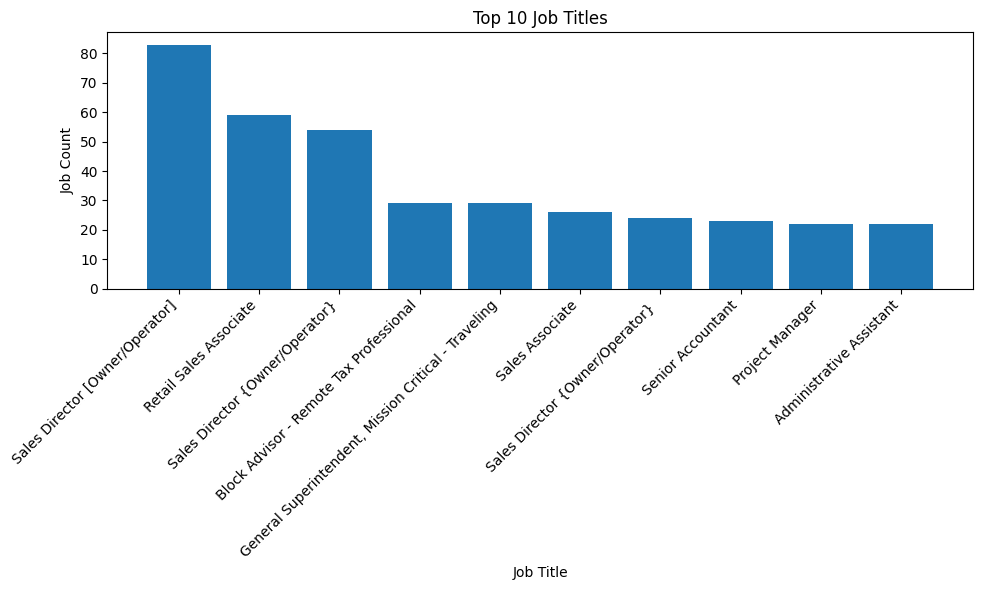

In [89]:
# Create a dataframe with the data
top_10_title_df = pd.DataFrame({'Job Title': top_10_title.index, 'Count': top_10_title.values})

# Create a barchart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_title_df['Job Title'], top_10_title_df['Count'])
plt.xlabel('Job Title')
plt.ylabel('Job Count')
plt.title('Top 10 Job Titles')
plt.xticks(rotation= 45, ha= 'right') # Rotate x-axis for better visibility
plt.tight_layout() # Ensure labels are not cut off
plt.show()

### What are the most top 10 Company Names Per Job Posting?

In [90]:
top_10_company = jobs_2['company_name'].value_counts().head(10)
top_10_company

company_name
City Lifestyle                    161
Verizon                           113
Insight Global                     98
The Mom Project                    92
Amazon                             60
Vivian Health                      56
Robert Half                        53
Raising Cane's Chicken Fingers     52
Petco                              51
H&R Block                          50
Name: count, dtype: int64

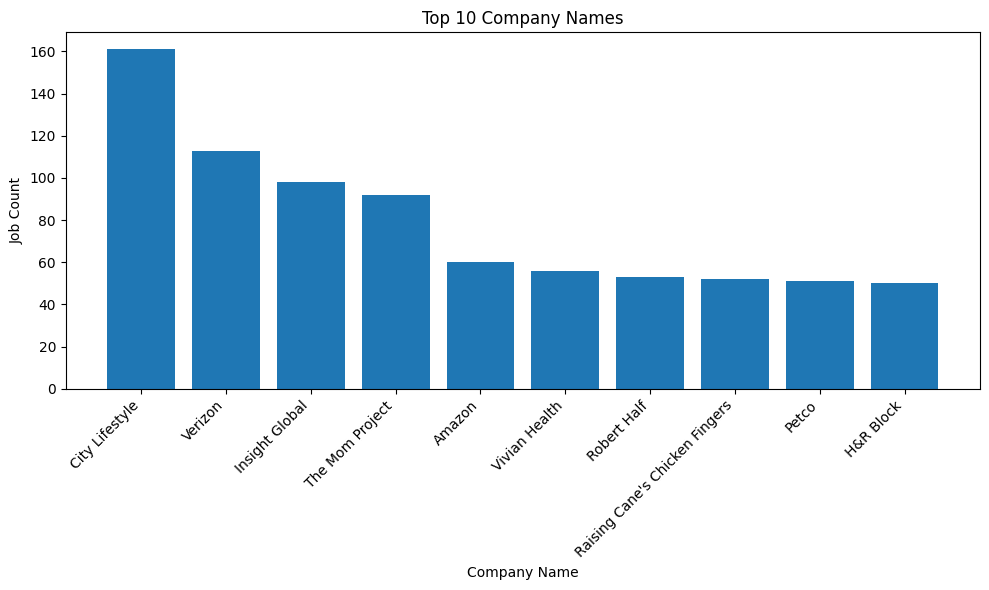

In [91]:
# Create a dataframe with the data
top_10_company_df = pd.DataFrame({'Company Name': top_10_company.index, 'Count': top_10_company.values})

# Create a barchart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_company_df['Company Name'], top_10_company_df['Count'])
plt.xlabel('Company Name')
plt.ylabel('Job Count')
plt.title('Top 10 Company Names')
plt.xticks(rotation= 45, ha= 'right') # Rotate x-axis for better visibility
plt.tight_layout() # Ensure labels are not cut off
plt.show()

In [92]:
top_10_skills = jobs_2['skill_abr'].value_counts().head(10)
top_10_skills

skill_abr
MGMT, MNFC    1182
HCPR           759
IT             716
OTHR           648
ENG, IT        527
SALE, BD       455
ACCT, FIN      322
FIN, SALE      191
ADM            171
ENG            169
Name: count, dtype: int64

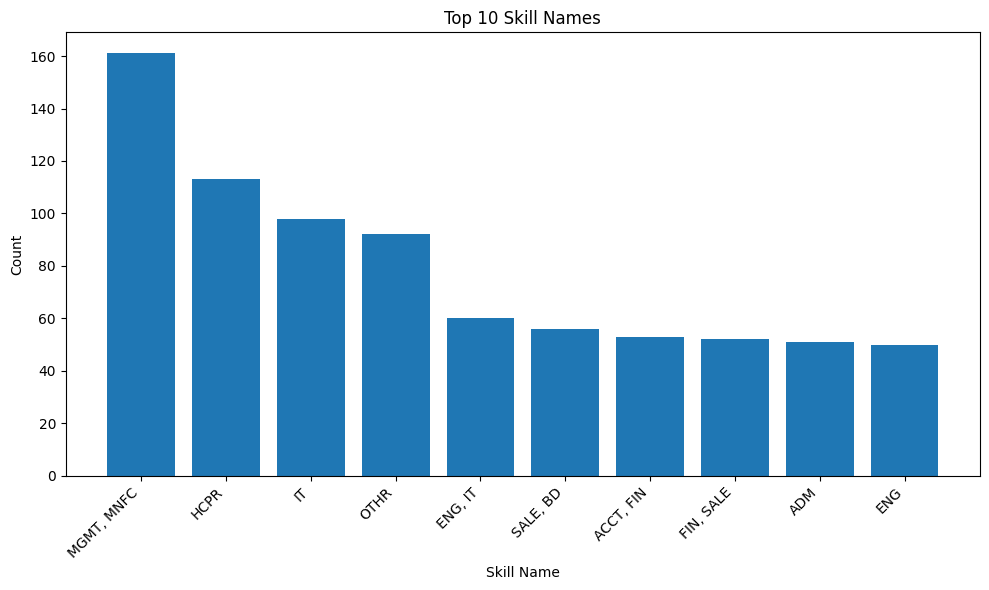

In [93]:
# Create a dataframe with the data
top_10_skills_df = pd.DataFrame({'Skill Name': top_10_skills.index, 'Count': top_10_skills.values})

# Create a barchart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_skills_df['Skill Name'], top_10_company_df['Count'])
plt.xlabel('Skill Name')
plt.ylabel('Count')
plt.title('Top 10 Skill Names')
plt.xticks(rotation= 45, ha= 'right') # Rotate x-axis for better visibility
plt.tight_layout() # Ensure labels are not cut off
plt.show()

In [94]:
jobs_2[jobs_2['skill_abr']=='HCPR']

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,work_type,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded,normalized_salary
21,Locum Critical Care Physician Assistant job in...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Atlanta, GA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,FULL_TIME,no_compensation,no_benefits,HCPR,Aya Locums,5.0,CA,US,San Diego,"Staffing & Recruiting, Staffing & Recruiting, ...","Locum Tenens Staffing, Locum Tenens Staffing, ...",1.692859e+09,85000.00
27,Mental Health Professional,79541.0000,30.0,55280.000000,YEARLY,Full-time,"Spokane, WA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,BASE_SALARY,no_benefits,HCPR,MultiCare Health System,7.0,WA,US,Tacoma,"Hospital & Health Care, Hospital & Health Care...","Health care, Non profit, Hospital, Health syst...",1.692861e+09,67410.50
28,Mental Health Professional,79541.0000,30.0,55280.000000,YEARLY,Full-time,"Spokane, WA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,BASE_SALARY,no_benefits,HCPR,MultiCare Health System,7.0,WA,US,Tacoma,"Hospital & Health Care, Hospital & Health Care...","Health care, Non profit, Hospital, Health syst...",1.692861e+09,67410.50
29,Clinic Managers - Physical Therapist,117510.6500,30.0,91010.650000,YEARLY,Full-time,"Puyallup, WA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,FULL_TIME,BASE_SALARY,no_benefits,HCPR,Olympic Sports & Spine,3.0,Washington,US,Tacoma,Hospital & Health Care,"Physical Therapy, Occupational Therapy, Massag...",1.692858e+09,104260.65
295,Limited Radiographer - Palmetto Family Medicine,86302.5253,30.0,61907.561348,YEARLY,Full-time,"West Columbia, SC",0.0,0.0,5.0,ComplexOnsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Mid-Senior level,0,FULL_TIME,no_compensation,"Medical insurance, Vision insurance, Dental in...",HCPR,Lexington Medical Center,6.0,South Carolina,US,West Columbia,"Hospital & Health Care, Hospital & Health Care...","Heart Center, Women's Services, Cancer Center,...",1.692834e+09,85000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15832,Physical Therapy Aide,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Anderson, IN",0.0,0.0,2.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,401(k),HCPR,PT Solutions Physical Therapy,5.0,GA,US,Atlanta,"Hospital & Health Care, Hospital & Health Care...","Physical Therapy, Orthopaedic Residency Progra...",1.692868e+09,85000.00
15833,Patient Services Coordinator - Front Office - ...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Chicago, IL",2.0,0.0,6.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,no_compensation,401(k),HCPR,PT Solutions Physical Therapy,5.0,GA,US,Atlanta,"Hospital & Health Care, Hospital & Health Care...","Physical Therapy, Orthopaedic Residency Progra...",1.692868e+09,85000.00
15840,Patient Services Coordinator - Front Office - ...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Canton, GA",2.0,0.0,5.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,1,FULL_TIME,no_compensation,401(k),HCPR,PT Solutions Physical Therapy,5.0,GA,US,Atlanta,"Hospital & Health Care, Hospital & Health Care...","Physical Therapy, Orthopaedic Residency Progra...",1.692868e+09,85000.00
15854,"Instrument & Equipment Specialist, Sterile Pro...",55.1500,30.0,36.770000,HOURLY,Full-time,"Greenbrae, CA",0.0,0.0,3.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,FULL_TIME,BASE_SALARY,no_benefits,HCPR,MarinHealth,5.0,CA,US,Greenbrae,Hospital & Health Care,"Behavioral Health, Breast Health, Cancer Care,...",1.692868e+09,95596.80


#### Distribution of jobs by work type

##### Duplication found with work_type

In [95]:
# I found 2 columns with duplicated names (work_type), change names to (work_type1) & (work_type2)
jobs_2.columns = ['job_title', 'max_salary', 'med_salary', 'min_salary', 'pay_period','work_type1', 'location', 'applies', 'remote_allowed', 
                 'views', 'application_type', 'expiry', 'closed_time', 'experience_level', 'sponsored', 'work_type2', 'compensation_type',
                 'benefits_type', 'skill_abr', 'company_name', 'company_size', 'state', 'country', 'city', 'industry', 'speciality',
                 'time_recorded', 'normalized_salary']

In [96]:
jobs_2['work_type1'].value_counts()

work_type1
Full-time     7256
Contract       945
Part-time      518
Temporary       67
Internship      43
Other           23
Name: count, dtype: int64

In [97]:
jobs_2['work_type2'].value_counts()

work_type2
FULL_TIME     7256
CONTRACT       945
PART_TIME      518
TEMPORARY       67
INTERNSHIP      43
OTHER           23
Name: count, dtype: int64

In [98]:
# work_type1 & work_type2 is identical with the same data
# i will drop one of these duplicated columns let's say (work_type2)
jobs_2.drop(columns=['work_type2'], inplace= True)

In [99]:
# Rename (work_type1) to (work_type)
jobs_2.rename(columns={'work_type1': 'work_type'}, inplace= True)

In [100]:
jobs_2.head()

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded,normalized_salary
15,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Maine, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0
16,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Connecticut, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0
17,Tax Analyst,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Atlanta, GA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Atlanta,"Retail, Retail, Retail",Convenience Store / Petroleum / Service / Sele...,1.692861e+09,85000.0
18,Contract Bilingual Recruiter,86302.5253,65000.0,61907.561348,YEARLY,Contract,"Phoenix, AZ",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Associate,0,BASE_SALARY,no_benefits,HR,ExecuSource,2.0,GA,US,Atlanta,"Staffing & Recruiting, Staffing & Recruiting","Direct Hire Search, Contract/Temporary Staffin...",1.692861e+09,65000.0
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Patchogue, NY",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,Patchogue,"Hospital & Health Care, Hospital & Health Care...","Cardiac Care , Women's Imaging, Bariatric , Di...",1.692861e+09,85000.0


In [101]:
fig = px.pie(jobs_2, names="work_type", title="Work Type Distribution", color_discrete_sequence=px.colors.qualitative.Set3) #Custom Color

# Customize the appearance of the chart
fig.update_traces(textposition= 'inside', textinfo= 'percent+label')
fig.update_layout(legend_title="work_type", showlegend= True)

fig.show()

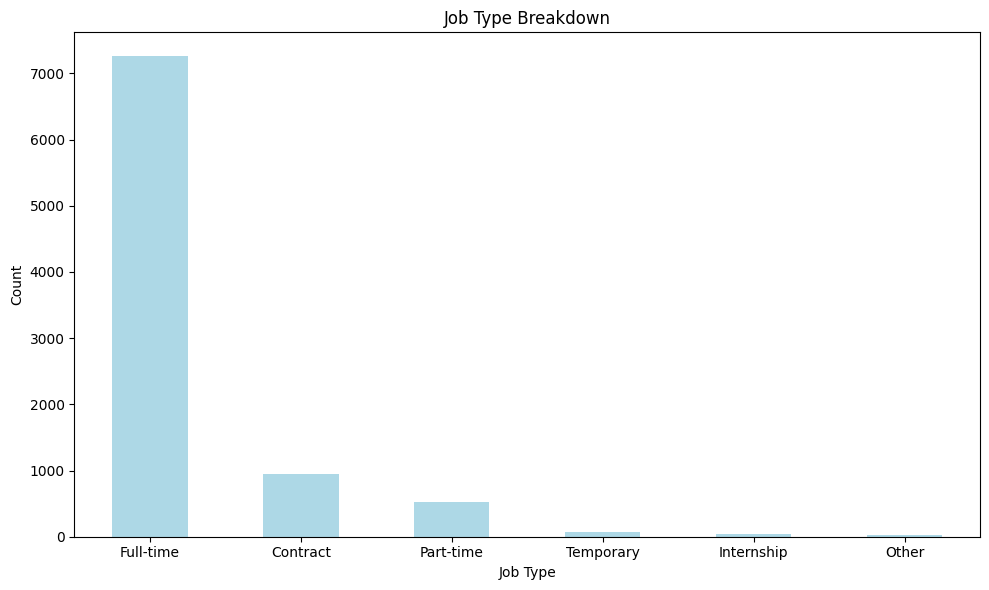

In [102]:
# Visualization 3: Job Type Breakdown (Bar Chart)
job_type_counts = jobs_2['work_type'].value_counts()
plt.figure(figsize=(10, 6))
job_type_counts.plot(kind='bar', color='lightblue')
plt.title('Job Type Breakdown')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Distribution of Sponsord jobs

In [103]:
fig = px.pie(jobs_2, names="sponsored", title="Sponsored Distribution", color_discrete_sequence=px.colors.qualitative.Set3) #Custom Color

# Customize the appearance of the chart
fig.update_traces(textposition= 'inside', textinfo= 'percent+label')
fig.update_layout(legend_title="sponsored", showlegend= True)

fig.show()

#### Distribution of Company Size

#### Application Method Distribution

In [104]:
fig= px.histogram(jobs_2, x= 'application_type', title='Application Method Distribution')
fig.update_traces(marker_color= 'red') # Set the bar color to red
fig.show()

#### What are the most top 10 country names per jobs posting?

In [105]:
top_10_countries = jobs_2['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10_countries = jobs_2[jobs_2['country'].isin(top_10_countries)]

# Create a treemap chart based on the "country" column for the top 10 countries
fig = px.treemap(df_top_10_countries, path=['country'], 
                title="Treemap Chart by Country (Top 10)")

# Customize the layout
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), showlegend=True)

# Show the chart
fig.show()

In [106]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
from wordcloud import WordCloud

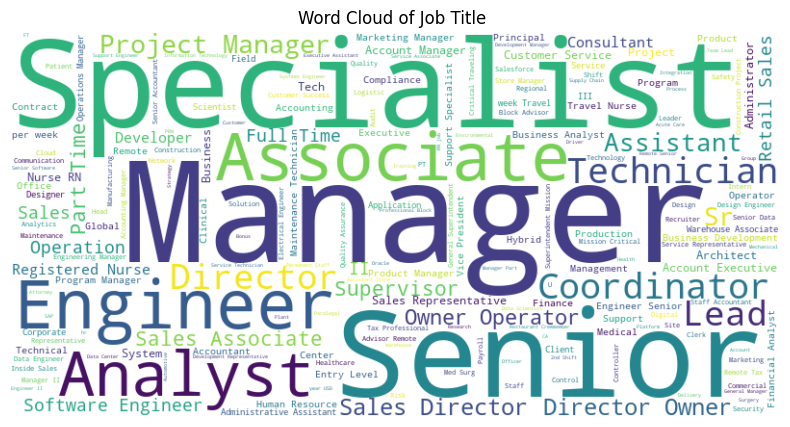

In [108]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(jobs_2['job_title']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Title ')
plt.show()

In [109]:
jobs_2['experience_level'].value_counts()

experience_level
Mid-Senior level    4078
Entry level         2942
Associate            999
Director             587
Internship           143
Executive            103
Name: count, dtype: int64

#### Distribution By Experience Level Per Job Posting

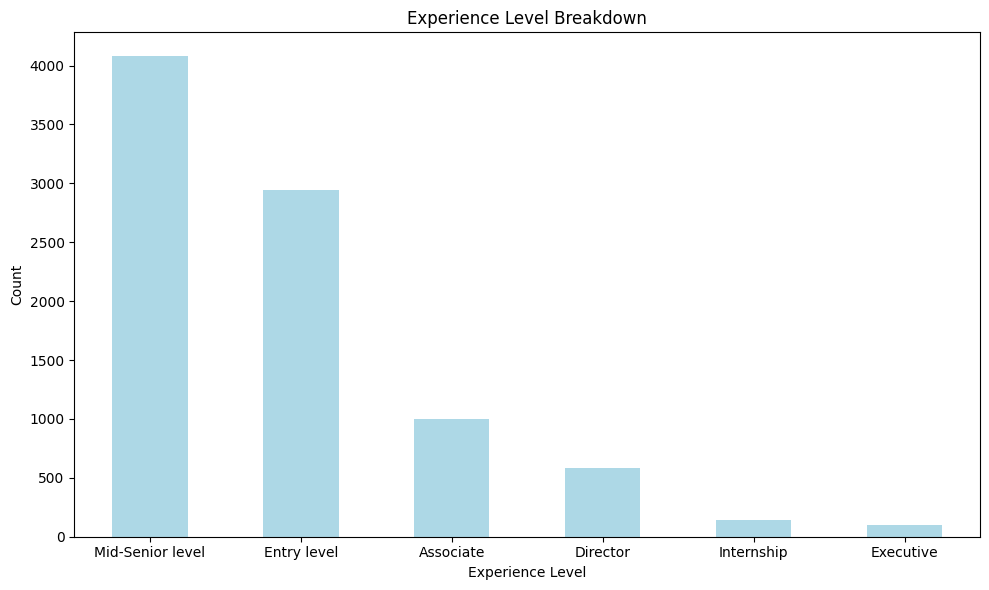

In [110]:
job_type_counts = jobs_2['experience_level'].value_counts()
plt.figure(figsize=(10, 6))
job_type_counts.plot(kind='bar', color='lightblue')
plt.title('Experience Level Breakdown')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [111]:
jobs_2['remote_allowed'].value_counts()

remote_allowed
0.0    7667
1.0    1185
Name: count, dtype: int64

#### Distribution By Remote Allowed Jobs 

In [112]:
fig = px.pie(jobs_2, names="remote_allowed", title="Remote Allowed Distribution", color_discrete_sequence=px.colors.qualitative.Set3) #Custom Color

# Customize the appearance of the chart
fig.update_traces(textposition= 'inside', textinfo= 'percent+label')
fig.update_layout(legend_title="Remote Allowed", showlegend= True)

fig.show()

In [113]:
jobs_2['views'].value_counts()

views
0.0      1637
1.0       618
2.0       412
3.0       307
4.0       229
         ... 
373.0       1
346.0       1
715.0       1
306.0       1
389.0       1
Name: count, Length: 572, dtype: int64

#### Distribution of No. of Job Views 

In [114]:
fig = px.pie(jobs_2, names="views", title="No of Job Views Distribution", color_discrete_sequence=px.colors.qualitative.Set3) #Custom Color

# Customize the appearance of the chart
fig.update_traces(textposition= 'inside', textinfo= 'percent+label')
fig.update_layout(legend_title="No of Views", showlegend= True)

fig.show()

In [115]:
jobs_2.columns

Index(['job_title', 'max_salary', 'med_salary', 'min_salary', 'pay_period',
       'work_type', 'location', 'applies', 'remote_allowed', 'views',
       'application_type', 'expiry', 'closed_time', 'experience_level',
       'sponsored', 'compensation_type', 'benefits_type', 'skill_abr',
       'company_name', 'company_size', 'state', 'country', 'city', 'industry',
       'speciality', 'time_recorded', 'normalized_salary'],
      dtype='object')

#### Distribution of Job Applies

In [116]:
fig = px.pie(jobs_2, names="applies", title="No of Applied Jobs Distribution", color_discrete_sequence=px.colors.qualitative.Set3) #Custom Color

# Customize the appearance of the chart
fig.update_traces(textposition= 'inside', textinfo= 'percent+label')
fig.update_layout(legend_title="No of Applied", showlegend= True)

fig.show()

#### What are the most top 10 Benefits Per Job Posting?

In [117]:
jobs_2['benefits_type'].value_counts().head(10)

benefits_type
no_benefits                                                      5765
401(k)                                                           1056
Vision insurance, 401(k)                                          173
Medical insurance, Vision insurance, Dental insurance, 401(k)     164
Disability insurance, 401(k)                                      147
401(k), Disability insurance                                      127
Disability insurance                                              114
Medical insurance                                                 110
401(k), Tuition assistance                                        105
401(k), Commuter benefits                                          53
Name: count, dtype: int64

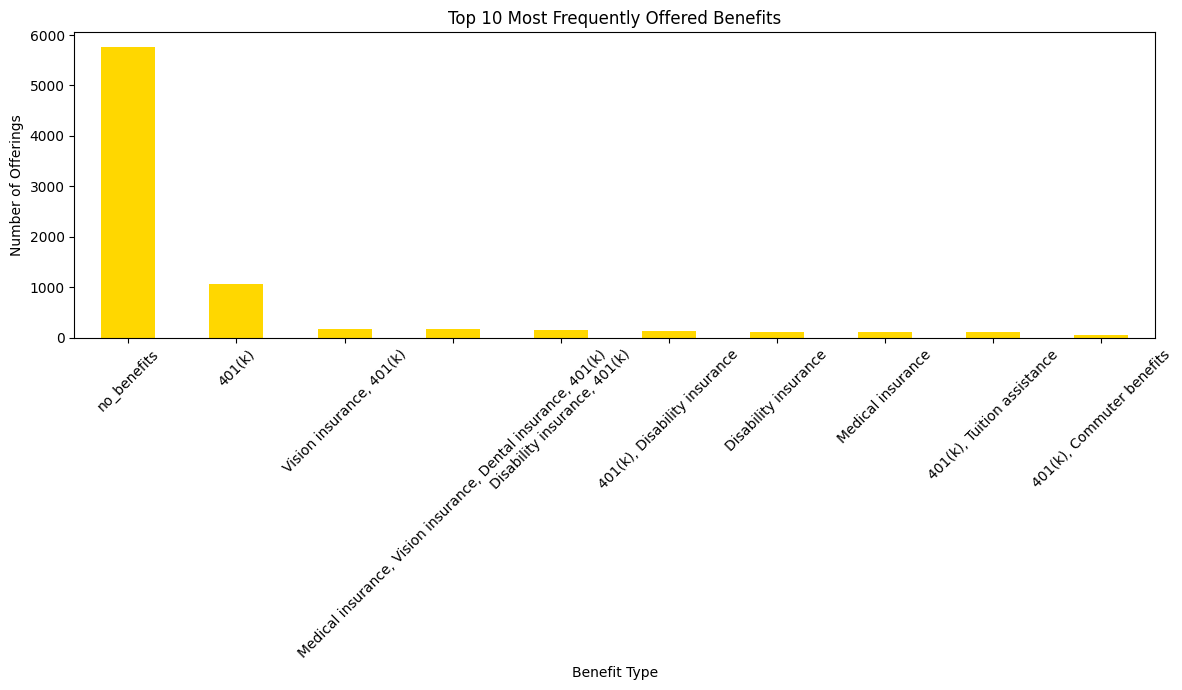

In [118]:
# Most frequently offered benefits
top_10_benefits = jobs_2['benefits_type'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
top_10_benefits.plot(kind='bar', color='gold')
plt.title('Top 10 Most Frequently Offered Benefits')
plt.xlabel('Benefit Type')
plt.ylabel('Number of Offerings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [119]:
jobs_2.groupby(['experience_level'])[['med_salary']].sum().sort_values('med_salary', ascending= False)

,med_salary
experience_level,
Director,14940824.54
Mid-Senior level,5799410.65
Executive,4087350.00
Entry level,2612299.11
Associate,766251.59
Internship,98748.16


<Figure size 1200x700 with 0 Axes>

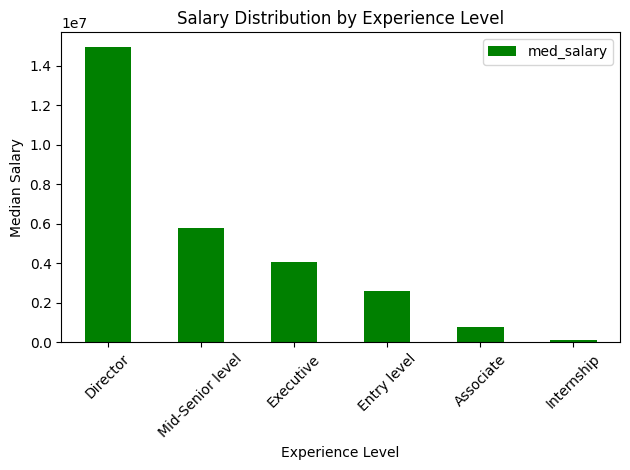

In [120]:
# Most frequently offered benefits
experience_levels = jobs_2.groupby(['experience_level'])[['med_salary']].sum().sort_values('med_salary', ascending= False)

# Plot
plt.figure(figsize=(12, 7))
experience_levels.plot(kind='bar', color='green')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
jobs_2.shape

(8852, 27)

<Axes: >

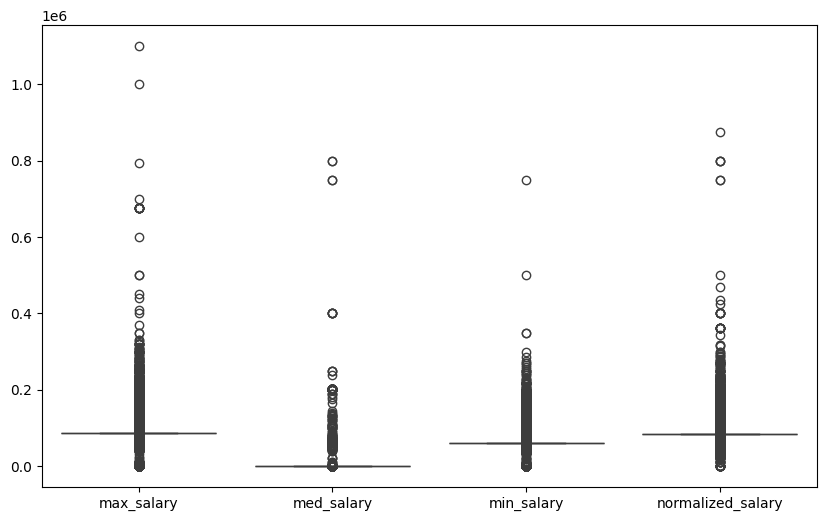

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=jobs_2[['max_salary', 'med_salary', 'min_salary', 'normalized_salary']])

In [123]:
jobs_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 15 to 15884
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   job_title          8852 non-null   object        
 1   max_salary         8852 non-null   float64       
 2   med_salary         8852 non-null   float64       
 3   min_salary         8852 non-null   float64       
 4   pay_period         8852 non-null   object        
 5   work_type          8852 non-null   object        
 6   location           8852 non-null   object        
 7   applies            8852 non-null   float64       
 8   remote_allowed     8852 non-null   float64       
 9   views              8852 non-null   float64       
 10  application_type   8852 non-null   object        
 11  expiry             8852 non-null   datetime64[ns]
 12  closed_time        8852 non-null   datetime64[ns]
 13  experience_level   8852 non-null   object        
 14  sponsored  

In [124]:
jobs_2.head()

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded,normalized_salary
15,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Maine, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0
16,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Connecticut, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0
17,Tax Analyst,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Atlanta, GA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Atlanta,"Retail, Retail, Retail",Convenience Store / Petroleum / Service / Sele...,1.692861e+09,85000.0
18,Contract Bilingual Recruiter,86302.5253,65000.0,61907.561348,YEARLY,Contract,"Phoenix, AZ",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Associate,0,BASE_SALARY,no_benefits,HR,ExecuSource,2.0,GA,US,Atlanta,"Staffing & Recruiting, Staffing & Recruiting","Direct Hire Search, Contract/Temporary Staffin...",1.692861e+09,65000.0
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Patchogue, NY",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0,no_compensation,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,Patchogue,"Hospital & Health Care, Hospital & Health Care...","Cardiac Care , Women's Imaging, Bariatric , Di...",1.692861e+09,85000.0


In [125]:
jobs_2['industry'].value_counts()

industry
Staffing & Recruiting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

#### Handling the duplication in one column (industry)

In [126]:
jobs_2['industry_list'] = jobs_2['industry'].str.split(',')

In [127]:
df_jobs_2 = pd.DataFrame(jobs_2['industry_list'].tolist()).fillna('').add_prefix('industry_')

In [128]:
df_jobs_2.head()

,industry_0,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13,industry_14,industry_15,industry_16,industry_17,industry_18,industry_19,industry_20,industry_21,industry_22,industry_23,industry_24,industry_25,industry_26,industry_27,industry_28,industry_29,industry_30,industry_31,industry_32,industry_33,industry_34,industry_35,industry_36,industry_37,industry_38,industry_39,industry_40,industry_41,industry_42,industry_43,industry_44,industry_45,industry_46,industry_47,industry_48,industry_49,industry_50,industry_51,industry_52,industry_53,industry_54,industry_55,industry_56,industry_57,industry_58,industry_59,industry_60,industry_61,industry_62,industry_63,industry_64,industry_65,industry_66,industry_67,industry_68,industry_69,industry_70,industry_71,industry_72,industry_73,industry_74,industry_75,industry_76,industry_77,industry_78,industry_79,industry_80,industry_81,industry_82,industry_83,industry_84,industry_85,industry_86,industry_87,industry_88,industry_89,industry_90,industry_91,industry_92,industry_93,industry_94,industry_95,industry_96,industry_97,industry_98,industry_99,industry_100,industry_101,industry_102,industry_103,industry_104,industry_105,industry_106,industry_107,industry_108,industry_109,industry_110,industry_111,industry_112,industry_113,industry_114,industry_115,industry_116,industry_117,industry_118,industry_119,industry_120,industry_121,industry_122,industry_123,industry_124,industry_125,industry_126,industry_127,industry_128,industry_129,industry_130,industry_131,industry_132,industry_133,industry_134,industry_135,industry_136,industry_137,industry_138,industry_139,industry_140,industry_141,industry_142,industry_143,industry_144,industry_145,industry_146,industry_147,industry_148,industry_149,industry_150,industry_151,industry_152,industry_153,industry_154,industry_155,industry_156,industry_157,industry_158,industry_159,industry_160,industry_161,industry_162,industry_163,industry_164,industry_165,industry_166,industry_167,industry_168,industry_169,industry_170,industry_171,industry_172,industry_173,industry_174,industry_175,industry_176,industry_177,industry_178,industry_179,industry_180,industry_181,industry_182,industry_183,industry_184,industry_185,industry_186,industry_187,industry_188,industry_189,industry_190,industry_191,industry_192,industry_193,industry_194,industry_195,industry_196,industry_197,industry_198,industry_199,industry_200,industry_201,industry_202,industry_203,industry_204,industry_205,industry_206,industry_207,industry_208,industry_209,industry_210,industry_211,industry_212,industry_213,industry_214,industry_215,industry_216,industry_217,industry_218,industry_219,industry_220,industry_221,industry_222,industry_223,industry_224,industry_225,industry_226,industry_227,industry_228,industry_229,industry_230,industry_231,industry_232,industry_233,industry_234,industry_235,industry_236,industry_237,industry_238,industry_239,industry_240,industry_241,industry_242,industry_243,industry_244,industry_245,industry_246,industry_247,industry_248,industry_249,industry_250,industry_251,industry_252,industry_253,industry_254,industry_255,industry_256,industry_257,industry_258,industry_259,industry_260,industry_261,industry_262,industry_263,industry_264,industry_265,industry_266,industry_267,industry_268,industry_269,industry_270,industry_271,industry_272,industry_273,industry_274,industry_275,industry_276,industry_277,industry_278,industry_279,industry_280,industry_281,industry_282,industry_283,industry_284,industry_285,industry_286,industry_287,industry_288,industry_289,industry_290,industry_291,industry_292,industry_293,industry_294,industry_295,industry_296,industry_297,industry_298,industry_299,industry_300,industry_301,industry_302,industry_303,industry_304,industry_305,industry_306,industry_307,industry_308,industry_309,industry_310,industry_311,industry_312,industry_313,industry_314,industry_315,i

In [129]:
# Concat one column (industry_0) with main dataset 
jobs_2 = pd.concat([jobs_2,df_jobs_2['industry_0'] ], axis= 1)

In [130]:
jobs_2.head()

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,location,applies,remote_allowed,views,application_type,expiry,closed_time,experience_level,sponsored,compensation_type,benefits_type,skill_abr,company_name,company_size,state,country,city,industry,speciality,time_recorded,normalized_salary,industry_list,industry_0
15,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Maine, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0.0,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0,"[Hospital & Health Care, Hospital & Health Ca...",Law Practice
16,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,"Connecticut, United States",0.0,1.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0.0,no_compensation,Disability insurance,SALE,GE HealthCare,7.0,0,US,Chicago,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09,85000.0,"[Hospital & Health Care, Hospital & Health Ca...",Facilities Services
17,Tax Analyst,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Atlanta, GA",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0.0,no_compensation,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Atlanta,"Retail, Retail, Retail",Convenience Store / Petroleum / Service / Sele...,1.692861e+09,85000.0,"[Retail, Retail, Retail]",Staffing & Recruiting
18,Contract Bilingual Recruiter,86302.5253,65000.0,61907.561348,YEARLY,Contract,"Phoenix, AZ",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Associate,0.0,BASE_SALARY,no_benefits,HR,ExecuSource,2.0,GA,US,Atlanta,"Staffing & Recruiting, Staffing & Recruiting","Direct Hire Search, Contract/Temporary Staffin...",1.692861e+09,65000.0,"[Staffing & Recruiting, Staffing & Recruiting]",Staffing & Recruiting
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,86302.5253,30.0,61907.561348,YEARLY,Full-time,"Patchogue, NY",0.0,0.0,0.0,OffsiteApply,1970-01-01 00:28:20,1970-01-01 00:28:10,Entry level,0.0,no_compensation,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,Patchogue,"Hospital & Health Care, Hospital & Health Care...","Cardiac Care , Women's Imaging, Bariatric , Di...",1.692861e+09,85000.0,"[Hospital & Health Care, Hospital & Health Ca...",International Trade & Development


In [131]:
jobs_2['industry_0'].value_counts()

industry_0
Staffing & Recruiting                1595
Information Technology & Services     951
Hospital & Health Care                817
Retail                                522
Computer Software                     473
                                     ... 
Farming                                 1
Gambling & Casinos                      1
Photography                             1
Medical Practice                        1
Package/Freight Delivery                1
Name: count, Length: 112, dtype: int64

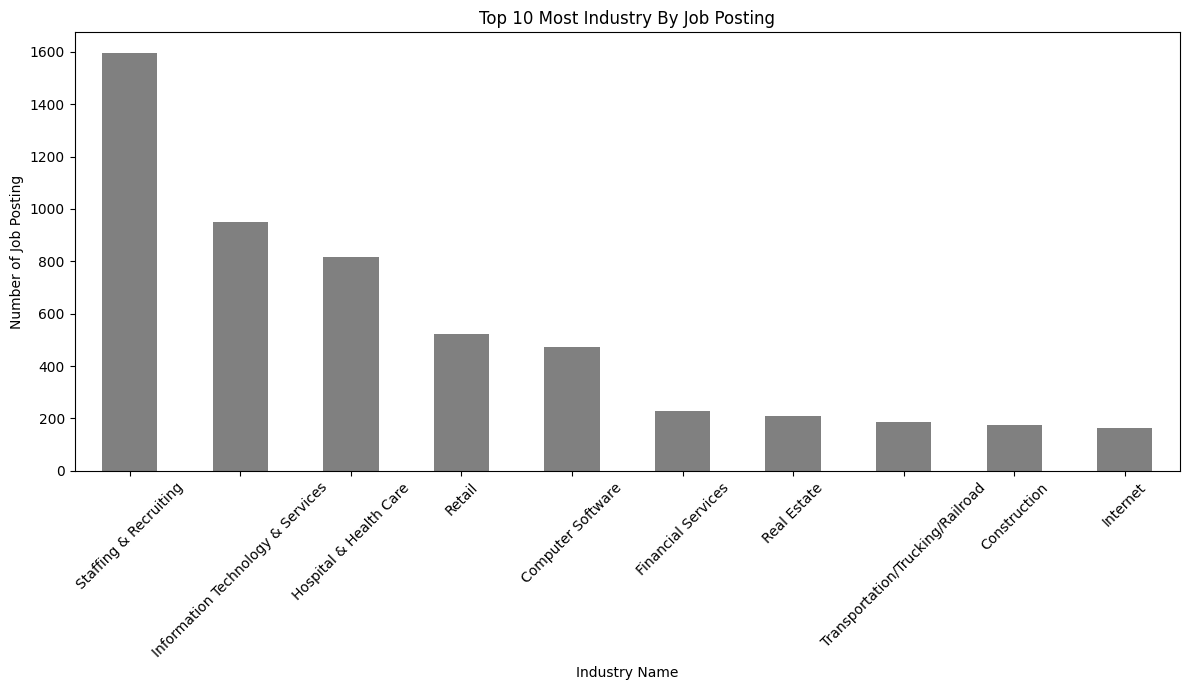

In [132]:
# Most frequently offered benefits
top_10_benefits = jobs_2['industry_0'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
top_10_benefits.plot(kind='bar', color='grey')
plt.title('Top 10 Most Industry By Job Posting')
plt.xlabel('Industry Name')
plt.ylabel('Number of Job Posting')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Drop unused columns from dataset jobs_2

In [133]:
jobs_2.pay_period.value_counts()

pay_period
YEARLY     7327
HOURLY     1486
MONTHLY      39
Name: count, dtype: int64

In [134]:
jobs_2.application_type.value_counts()

application_type
OffsiteApply          5809
ComplexOnsiteApply    2733
SimpleOnsiteApply      310
Name: count, dtype: int64

In [135]:
jobs_2['compensation_type'].value_counts()

compensation_type
no_compensation    5056
BASE_SALARY        3796
Name: count, dtype: int64

In [136]:
jobs_2.company_size.value_counts()

company_size
7.0    2975
5.0    1961
2.0    1019
6.0     977
3.0     852
4.0     750
1.0     318
Name: count, dtype: int64

In [137]:
jobs_2.drop(['expiry', 'closed_time', 'time_recorded', 'application_type', 'compensation_type','city', 'sponsored', 'location' ], axis=1, inplace= True)

In [138]:
jobs_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13170 entries, 15 to 8848
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          8852 non-null   object 
 1   max_salary         8852 non-null   float64
 2   med_salary         8852 non-null   float64
 3   min_salary         8852 non-null   float64
 4   pay_period         8852 non-null   object 
 5   work_type          8852 non-null   object 
 6   applies            8852 non-null   float64
 7   remote_allowed     8852 non-null   float64
 8   views              8852 non-null   float64
 9   experience_level   8852 non-null   object 
 10  benefits_type      8852 non-null   object 
 11  skill_abr          8852 non-null   object 
 12  company_name       8852 non-null   object 
 13  company_size       8852 non-null   float64
 14  state              8852 non-null   object 
 15  country            8852 non-null   object 
 16  industry           8852 non

In [139]:
jobs_2.groupby('experience_level')[['normalized_salary']].describe()

normalized_salary                                          \
                             count           mean            std       min   
experience_level                                                             
Associate                    999.0   83934.910731   29608.346493     18.46   
Director                     587.0  125870.575060   67068.955623    135.00   
Entry level                 2942.0   76561.546550   24018.812223     16.00   
Executive                    103.0  145033.046019  126149.996315    125.00   
Internship                   143.0   81725.390210   13255.438932  24960.00   
Mid-Senior level            4078.0   97313.149727   40478.923438     15.00   

                                                        
                      25%      50%       75%       max  
experience_level                                        
Associate         70000.0  85000.0   85000.0  250000.0  
Director          85000.0  85000.0  172500.0  750000.0  
Entry level       62400.0  85000.0   85000.0  315000.0  
Executive         85000.0  85000.0  175500.0  800000.0  
Internship        85000.0  85000.0   85000.0  116650.0  
Mid-Senior level  85000.0  85000.0   97746.0  875000.0

In [140]:
jobs_2.head(2)

,job_title,max_salary,med_salary,min_salary,pay_period,work_type,applies,remote_allowed,views,experience_level,benefits_type,skill_abr,company_name,company_size,state,country,industry,speciality,normalized_salary,industry_list,industry_0
15,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,0.0,1.0,0.0,Entry level,Disability insurance,SALE,GE HealthCare,7.0,0,US,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",85000.0,"[Hospital & Health Care, Hospital & Health Ca...",Law Practice
16,"Virtual Sales Associate Account Manager, Women...",86302.5253,30.0,61907.561348,YEARLY,Full-time,0.0,1.0,0.0,Entry level,Disability insurance,SALE,GE HealthCare,7.0,0,US,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",85000.0,"[Hospital & Health Care, Hospital & Health Ca...",Facilities Services


In [141]:
jobs_2['country'].unique()

array(['US', 'ES', 'CA', 'AU', 'GB', 'FR', 'IN', 'NL', 'DE', 'CH', 'IS',
       'IE', 'CN', 'IL', '0', 'SE', 'KR', 'SG', 'NO', 'BE', 'TW', 'LU',
       'AT', 'IT', 'JP', 'HK', 'MX', 'NZ', 'FI', 'DK', 'TR', 'SA', 'BM',
       nan], dtype=object)

In [142]:
jobs_2['work_type'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Temporary', 'Internship',
       'Other', nan], dtype=object)

In [143]:
jobs_2.columns

Index(['job_title', 'max_salary', 'med_salary', 'min_salary', 'pay_period',
       'work_type', 'applies', 'remote_allowed', 'views', 'experience_level',
       'benefits_type', 'skill_abr', 'company_name', 'company_size', 'state',
       'country', 'industry', 'speciality', 'normalized_salary',
       'industry_list', 'industry_0'],
      dtype='object')

#### Job Titles per No. of Applied

In [144]:
jobs_2.groupby(['job_title','work_type'])[['applies']].sum().sort_values('applies', ascending= False).reset_index().head(10)

,job_title,work_type,applies
0,Junior Software Engineer,Full-time,1615.0
1,Customer Service Representative,Contract,1028.0
2,Recruiter,Full-time,997.0
3,Data Engineer,Contract,849.0
4,Scrum Master / Project Manager (Healthcare/Cal...,Contract,832.0
5,Senior Business Analyst,Contract,670.0
6,Healthcare Recruiter,Full-time,668.0
7,Business Intelligence Analyst,Full-time,646.0
8,Talent Acquisition Specialist,Full-time,591.0
9,Data Analyst,Full-time,500.0


### Predection

##### (normalized_salary) is the calculation of (max_salary,med_salary,min_salary), accordingly i will drop these three features from
##### the new dataset for ML model

In [145]:
jobs_2.columns

Index(['job_title', 'max_salary', 'med_salary', 'min_salary', 'pay_period',
       'work_type', 'applies', 'remote_allowed', 'views', 'experience_level',
       'benefits_type', 'skill_abr', 'company_name', 'company_size', 'state',
       'country', 'industry', 'speciality', 'normalized_salary',
       'industry_list', 'industry_0'],
      dtype='object')

In [146]:
jobs_2_pre = jobs_2[['job_title','work_type', 'applies', 'remote_allowed', 'views', 'experience_level',
       'benefits_type', 'skill_abr', 'company_name', 'company_size', 'state',
       'country','speciality', 'normalized_salary','industry_0']]

jobs_2_pre.head()

,job_title,work_type,applies,remote_allowed,views,experience_level,benefits_type,skill_abr,company_name,company_size,state,country,speciality,normalized_salary,industry_0
15,"Virtual Sales Associate Account Manager, Women...",Full-time,0.0,1.0,0.0,Entry level,Disability insurance,SALE,GE HealthCare,7.0,0,US,"Healthcare, Biotechnology, Healthcare, Biotech...",85000.0,Law Practice
16,"Virtual Sales Associate Account Manager, Women...",Full-time,0.0,1.0,0.0,Entry level,Disability insurance,SALE,GE HealthCare,7.0,0,US,"Healthcare, Biotechnology, Healthcare, Biotech...",85000.0,Facilities Services
17,Tax Analyst,Full-time,0.0,0.0,0.0,Entry level,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Convenience Store / Petroleum / Service / Sele...,85000.0,Staffing & Recruiting
18,Contract Bilingual Recruiter,Contract,0.0,0.0,0.0,Associate,no_benefits,HR,ExecuSource,2.0,GA,US,"Direct Hire Search, Contract/Temporary Staffin...",65000.0,Staffing & Recruiting
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,Full-time,0.0,0.0,0.0,Entry level,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,"Cardiac Care , Women's Imaging, Bariatric , Di...",85000.0,International Trade & Development


In [147]:
jobs_2_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13170 entries, 15 to 8848
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          8852 non-null   object 
 1   work_type          8852 non-null   object 
 2   applies            8852 non-null   float64
 3   remote_allowed     8852 non-null   float64
 4   views              8852 non-null   float64
 5   experience_level   8852 non-null   object 
 6   benefits_type      8852 non-null   object 
 7   skill_abr          8852 non-null   object 
 8   company_name       8852 non-null   object 
 9   company_size       8852 non-null   float64
 10  state              8852 non-null   object 
 11  country            8852 non-null   object 
 12  speciality         8852 non-null   object 
 13  normalized_salary  8852 non-null   float64
 14  industry_0         8852 non-null   object 
dtypes: float64(5), object(10)
memory usage: 1.6+ MB


##### Check about outliers

<Axes: >

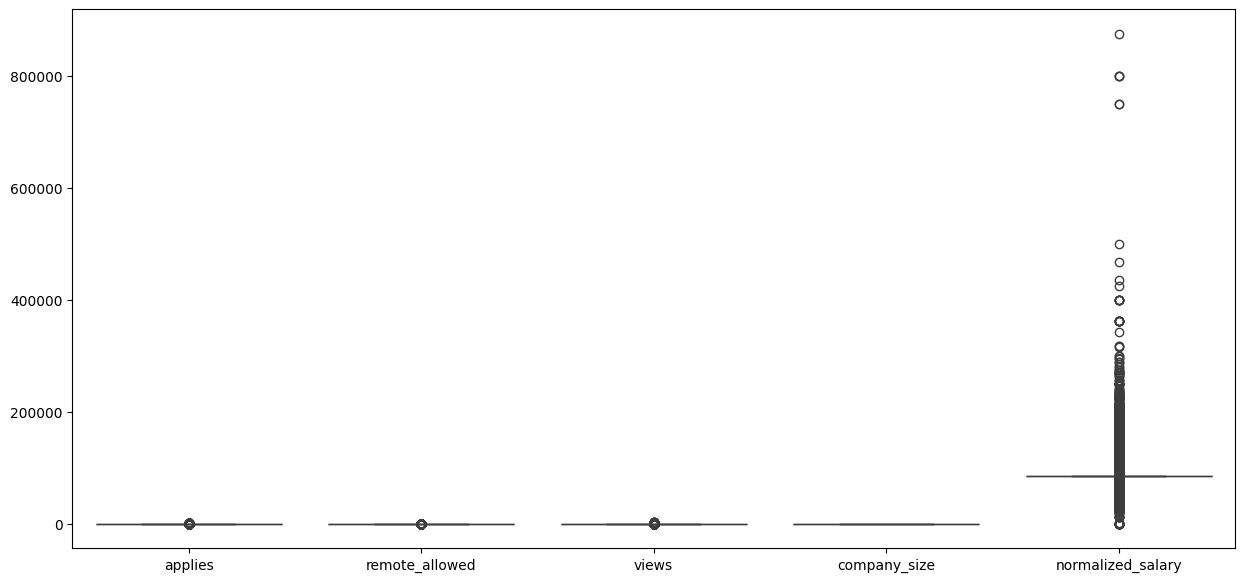

In [148]:
plt.figure(figsize= (15,7))
sns.boxplot(data= jobs_2_pre) # There are outliers in (normalized_salary)

#### Handle missing value

In [149]:
jobs_2_pre.isna().sum()

job_title            4318
work_type            4318
applies              4318
remote_allowed       4318
views                4318
experience_level     4318
benefits_type        4318
skill_abr            4318
company_name         4318
company_size         4318
state                4318
country              4318
speciality           4318
normalized_salary    4318
industry_0           4318
dtype: int64

In [150]:
jobs_2_pre= jobs_2_pre.dropna()


In [151]:
jobs_2_pre.isna().sum()

job_title            0
work_type            0
applies              0
remote_allowed       0
views                0
experience_level     0
benefits_type        0
skill_abr            0
company_name         0
company_size         0
state                0
country              0
speciality           0
normalized_salary    0
industry_0           0
dtype: int64

In [152]:
jobs_2_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 15 to 8851
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          4534 non-null   object 
 1   work_type          4534 non-null   object 
 2   applies            4534 non-null   float64
 3   remote_allowed     4534 non-null   float64
 4   views              4534 non-null   float64
 5   experience_level   4534 non-null   object 
 6   benefits_type      4534 non-null   object 
 7   skill_abr          4534 non-null   object 
 8   company_name       4534 non-null   object 
 9   company_size       4534 non-null   float64
 10  state              4534 non-null   object 
 11  country            4534 non-null   object 
 12  speciality         4534 non-null   object 
 13  normalized_salary  4534 non-null   float64
 14  industry_0         4534 non-null   object 
dtypes: float64(5), object(10)
memory usage: 566.8+ KB


<Axes: >

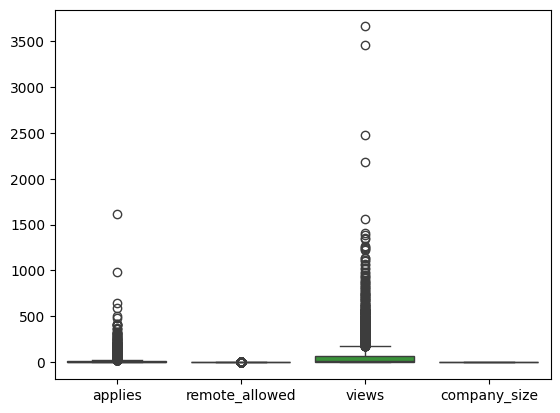

In [153]:
# Check outliers again after drop the missing values in all columns except (normalized_salary)

sns.boxplot(data= jobs_2_pre.drop('normalized_salary', axis=1 )) # There are outliers in (applies) and (views)

#### Handle Outliers

##### Install datasist

In [154]:
! pip install datasist

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [155]:
from datasist.structdata import detect_outliers
index = detect_outliers(jobs_2_pre, 0, ['applies','views'])
len(index) # Count outliers rows

718

In [156]:
# Drop the outliers rows
jobs_2_pre.drop(index, inplace= True) 

#### Split data into input & output

In [157]:
X = jobs_2_pre.drop('normalized_salary', axis=1)
y = jobs_2_pre['normalized_salary']

In [158]:
X

,job_title,work_type,applies,remote_allowed,views,experience_level,benefits_type,skill_abr,company_name,company_size,state,country,speciality,industry_0
15,"Virtual Sales Associate Account Manager, Women...",Full-time,0.0,1.0,0.0,Entry level,Disability insurance,SALE,GE HealthCare,7.0,0,US,"Healthcare, Biotechnology, Healthcare, Biotech...",Law Practice
16,"Virtual Sales Associate Account Manager, Women...",Full-time,0.0,1.0,0.0,Entry level,Disability insurance,SALE,GE HealthCare,7.0,0,US,"Healthcare, Biotechnology, Healthcare, Biotech...",Facilities Services
17,Tax Analyst,Full-time,0.0,0.0,0.0,Entry level,no_benefits,"FIN, ANLS, ACCT",RaceTrac,6.0,Georgia,US,Convenience Store / Petroleum / Service / Sele...,Staffing & Recruiting
18,Contract Bilingual Recruiter,Contract,0.0,0.0,0.0,Associate,no_benefits,HR,ExecuSource,2.0,GA,US,"Direct Hire Search, Contract/Temporary Staffin...",Staffing & Recruiting
19,Transporter - Full Time Evenings 3pm-11pm; Rot...,Full-time,0.0,0.0,0.0,Entry level,no_benefits,"MGMT, MNFC",Long Island Community Hospital,5.0,New York,US,"Cardiac Care , Women's Imaging, Bariatric , Di...",International Trade & Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,Endpoint and IS Security Specialist,Full-time,1.0,0.0,16.0,Entry level,no_benefits,"OTHR, IT, MGMT",Lowes Foods,6.0,North Carolina,US,"Retail, Food Services, Grocery, Retail Store M...",Construction
8847,Sheet Metal Mechanic,Full-time,0.0,0.0,2.0,Entry level,"Medical insurance, 401(k)","MGMT, MNFC",Tradesmen International,7.0,Ohio,US,"Total Labor Support Services, Productivity Con...",Information Technology & Services
8849,Senior Project Manager,Full-time,1.0,0.0,31.0,Mid-Senior level,no_benefits,"DSGN, CNSL, ENG",Dewberry,5.0,Virginia,US,"Architects, Engineers, Consultants, architectu...",Hospital & Health Care
8850,Registered Nurse - Communications Center (Hybrid),Full-time,0.0,0.0,7.0,Mid-Senior level,no_benefits,HCPR,Rochester Regional Health,7.0,New York,US,"cardiology, bariatric surgery, oncology, endoc...",Hospital & Health Care


In [159]:
y

15      85000.0
16      85000.0
17      85000.0
18      65000.0
19      85000.0
         ...   
8846    85000.0
8847    83200.0
8849    85000.0
8850    85000.0
8851    85000.0
Name: normalized_salary, Length: 3816, dtype: float64

In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 15 to 8851
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         3816 non-null   object 
 1   work_type         3816 non-null   object 
 2   applies           3816 non-null   float64
 3   remote_allowed    3816 non-null   float64
 4   views             3816 non-null   float64
 5   experience_level  3816 non-null   object 
 6   benefits_type     3816 non-null   object 
 7   skill_abr         3816 non-null   object 
 8   company_name      3816 non-null   object 
 9   company_size      3816 non-null   float64
 10  state             3816 non-null   object 
 11  country           3816 non-null   object 
 12  speciality        3816 non-null   object 
 13  industry_0        3816 non-null   object 
dtypes: float64(4), object(10)
memory usage: 447.2+ KB


#### Dealing with categorical data

In [161]:
# The data is not sorted or ordered, according we will use one-hot-encoding
X = pd.get_dummies(X, drop_first= True)

#### Split data into train and test

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

#### Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)# we use transform without fit with the test to avoid the data leckage

##### Switch x_train_scaled to dataframe (Becasuse its back as a numpy array)

In [164]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

#### Handle imbalance Data (If we are wrking with classification problem that has imbalance class)

In [165]:
! pip install imbalanced-learn # install package

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


#### Model

In [166]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)